# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import Methods as Md
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/Comparison/'
X = DS.LoadData('Shape')

# Applying T-SNE

In [4]:
X_tsne = Md.UseMethod('TSNE', X)

# Plotting the results

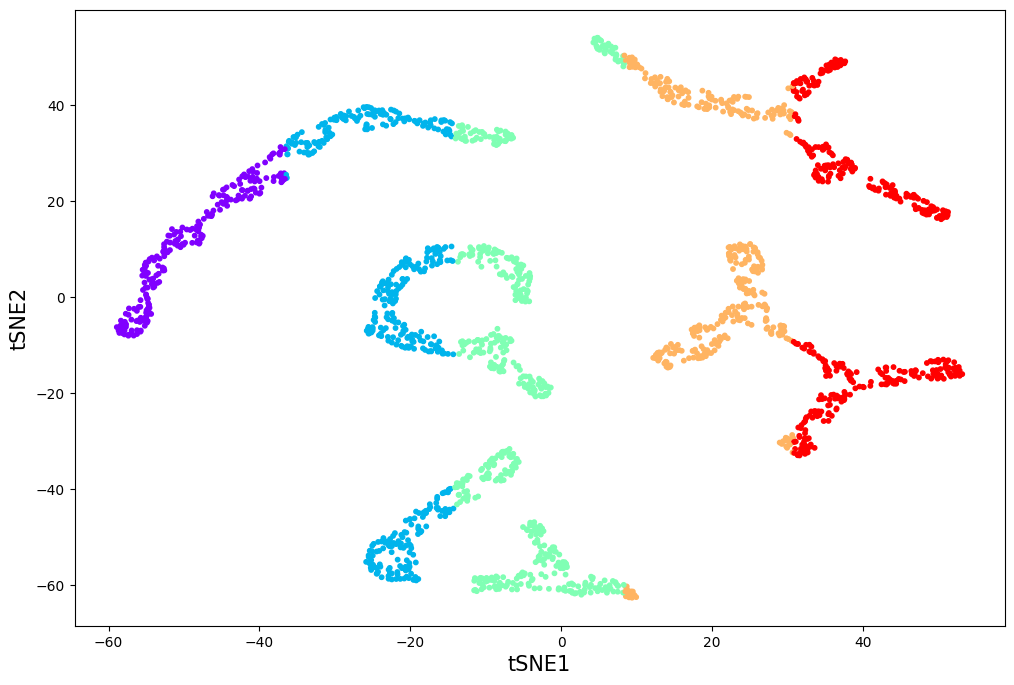

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=X_tsne[:, 0], cmap=plt.cm.get_cmap('rainbow', 5),s=10)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Shape_tSNE.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [6]:
X_umap = Md.UseMethod('UMAP', X)

# Plotting the results

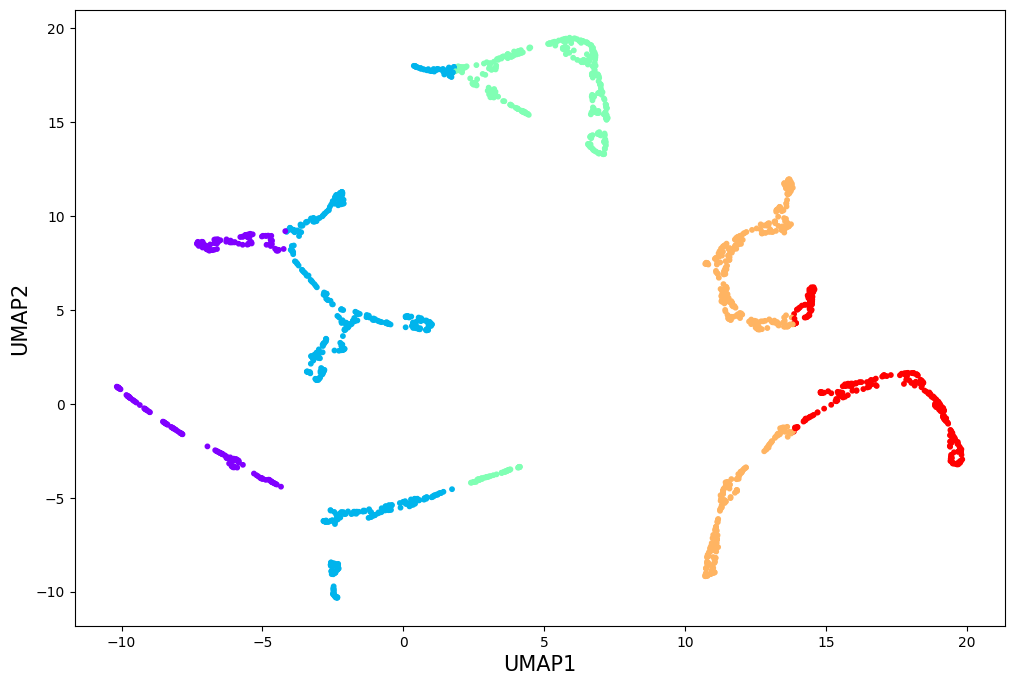

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=X_umap[:, 0], cmap=plt.cm.get_cmap('rainbow', 5),s=10)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Shape_UMAP.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [8]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [9]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.313966,0.389998
1,0.500658,0.463956
2,0.646073,0.403648
3,0.480486,0.396666
4,0.281995,0.422535
5,0.451137,0.395232
6,0.500465,0.449784
7,0.389758,0.433898
8,0.473437,0.386367
9,0.644196,0.410261


# Projecting data into high dimension and applying other methods
Using projection: $(x,y) \rightarrow (x+y,x-y,xy,x^2,y^2,x^2y,xy^2,x^3,y^3)$

In [10]:
from D2toD9 import Convert
X_9D = Convert(X)

# Applying T-SNE

In [11]:
X_tsne = Md.UseMethod('TSNE', X_9D)

# Plotting the results

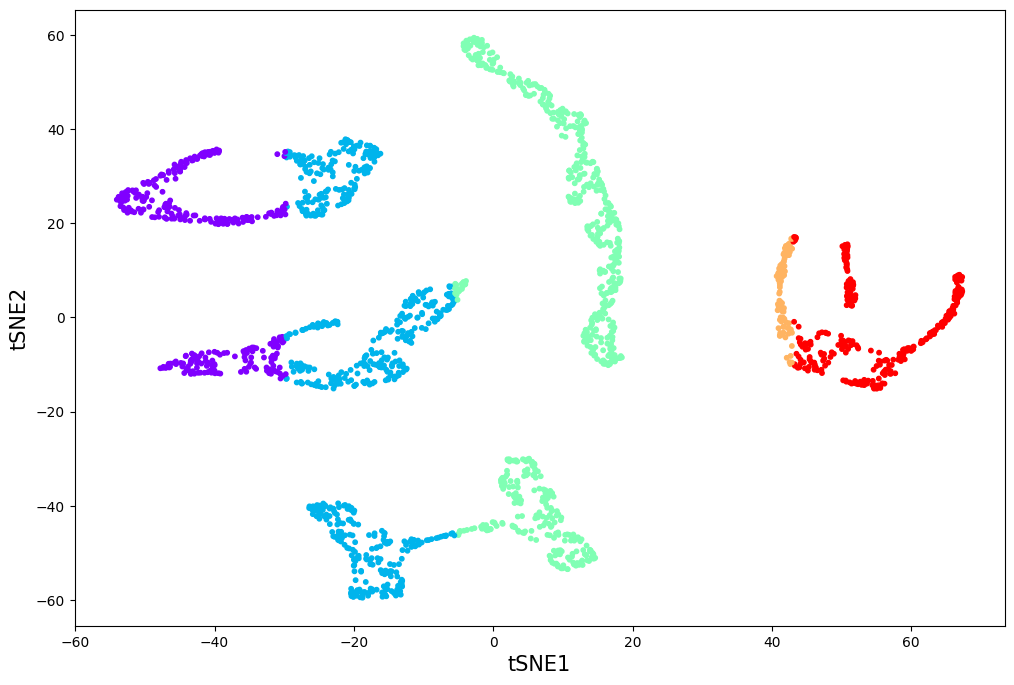

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=X_tsne[:, 0], cmap=plt.cm.get_cmap('rainbow', 5),s=10)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Shape_tSNE_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [13]:
X_umap = Md.UseMethod('UMAP', X_9D)

# Plotting the results

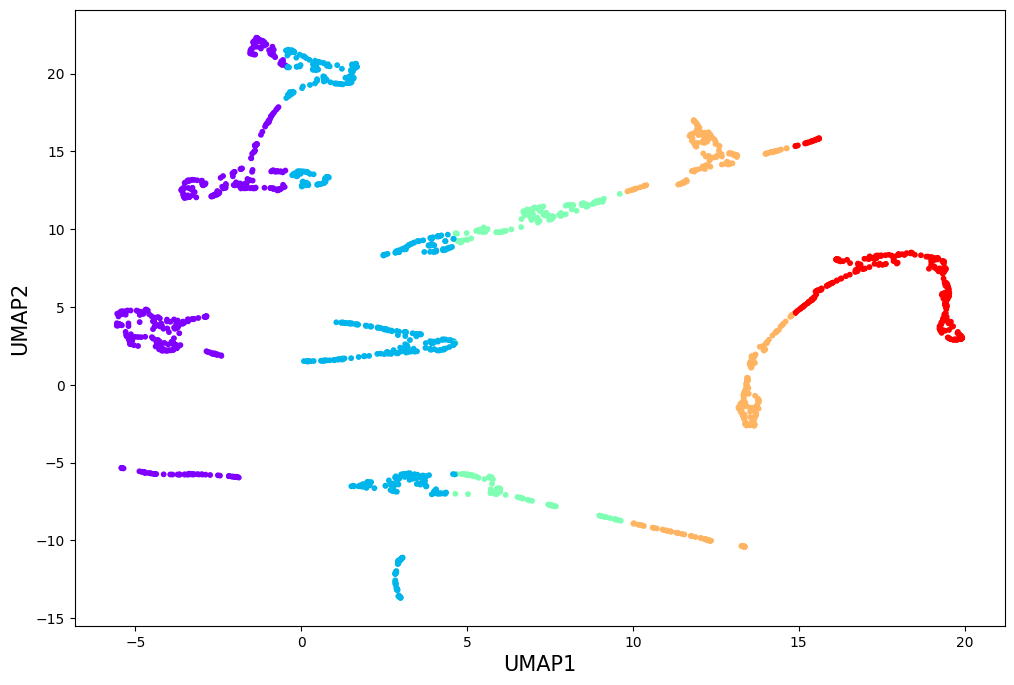

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=X_umap[:, 0], cmap=plt.cm.get_cmap('rainbow', 5),s=10)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Shape_UMAP_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [15]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X_9D, X_9D)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [16]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.213266,0.337312
1,0.551643,0.295489
2,0.469943,0.374319
3,0.450484,0.347871
4,0.478462,0.355494
5,0.415725,0.356668
6,0.426023,0.334187
7,0.178741,0.310094
8,0.424976,0.334982
9,0.341295,0.354936
